In [11]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/raw.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')


In [48]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 82.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.8 MB/s eta 0:00:00


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from underthesea import word_tokenize

Load training set

In [33]:
train_set = pd.read_csv("/content/drive/MyDrive/raw/train.csv")
train_set

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0
...,...,...
24043,Thả tim cho sự cống hiến của ngài,0
24044,Thua !,0
24045,Ở Việt Nam thì có khánh sky..hải ngoại có trần...,0
24046,"1:22 ai lớp du chu cờ moo, Duyên dáng quá cô ơi",0


Check missing value

In [34]:
missing_values = train_set.isnull().sum()

print(missing_values)

missing_percentage = (missing_values / len(train_set)) * 100

missing_percentage


free_text    2
label_id     0
dtype: int64


,0
free_text,0.008317
label_id,0.000000


In [35]:
train_set = train_set.dropna()
train_set.isnull().sum()


,0
free_text,0
label_id,0


check duplicate values

In [36]:
duplicate_rows = train_set[train_set.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
duplicate_rows


Number of duplicate rows: 1356


,free_text,label_id
225,reaction thầy ơi,0
442,đặt khô gà ở đâu v thầy ơi,0
466,Mệt quá thầy ạ 😞,0
696,xin ạ,0
790,Tại sao phải trả lời thầy,0
...,...,...
23986,Đình Quang ụa đâu có giải gì bên vn đau ta,0
23992,Thành Huy Hoàng Tiến,0
24008,Tự hào thầy Ba gold :)),0
24010,Lỡ tay thầy ơi :)),0


In [37]:
train_set = train_set.drop_duplicates()
len(train_set[train_set.duplicated()])


0

get class distribution

In [38]:
train_set['label_id'].value_counts()

,count
label_id,
0,18652
2,2495
1,1543


EDA

Plot class distribution

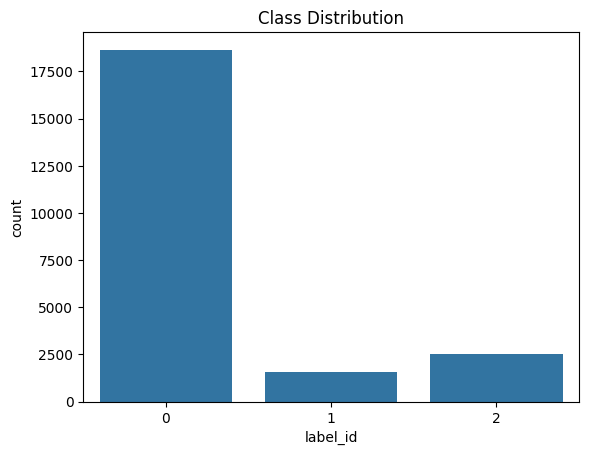

In [39]:
sns.countplot(x=train_set['label_id'])
plt.title("Class Distribution")
plt.show()

Plot text length distribution

In [42]:
train_set['text_length'] = train_set['free_text'].apply(lambda x: len(str(x).split()))

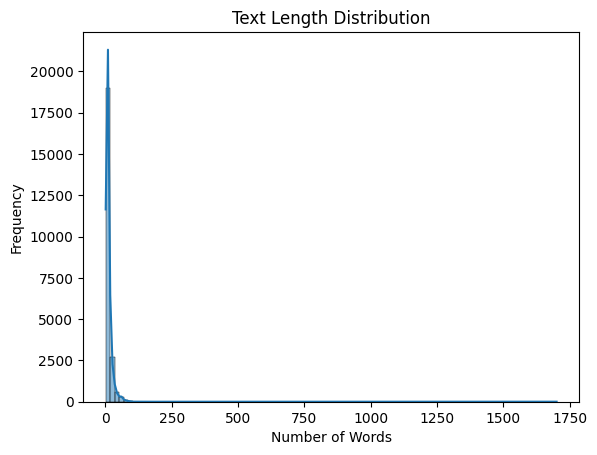

In [47]:
sns.histplot(train_set['text_length'], bins=100, kde=True)
plt.title("Text Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [53]:
print(train_set['text_length'].describe())

max_length = int(train_set['text_length'].quantile(0.95))
print(f"95th percentile text length: {max_length} words")


count    22690.000000
mean        11.775143
std         20.144481
min          1.000000
25%          5.000000
50%          8.000000
75%         14.000000
max       1701.000000
Name: text_length, dtype: float64
95th percentile text length: 33 words


In [50]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9À-Ỹà-ỹ\s]", "", text)
    text = word_tokenize(text, format="text")
    return text

In [51]:
train_set['cleaned_comment'] = train_set['free_text'].apply(clean_text)
train_set[['free_text', 'cleaned_comment']].head(15)

,free_text,cleaned_comment
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,em được làm fan cứng luôn rồi nè reaction quá ...
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,đúng là bọn mắt híp lò_xo thụt bên việt_nam t ...
2,Đậu Văn Cường giờ giống thằng sida hơn à,đậu văn_cường giờ giống thằng sida hơn à
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,côn_đồ cục súc vô_nhân_tính đề_nghi vn nhà_nướ...
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,từ lý_thuyết đến thực_hành là cả 1 câu_chuyện dài
5,Coronavirus is manmade,coronavirus is manmade
6,Đố chúng m nhận ra ai,đố chúng m nhận ra ai
7,Lúp lúp như chó .,lúp lúp như chó
8,🥰🥰🥰,
9,"Thế mà mình nói mấy thằng bắc kì, bọn đó lại b...",thế mà mình nói mấy thằng bắc kì_bọn đó lại bâ...


In [52]:
train_set.to_csv("/content/drive/MyDrive/raw/processed_train.csv", index=False)